(content:rv:beta)=
# Beta distribution

In the following, let $X$ be a random variable that follows a *beta* distribution with shape parameters $\alpha$ and $\beta$.
The support of $X$ is $(a,b)$.
An outcome of $X$ is denoted as $x$.

In [1]:
import fesslix as flx
flx.load_engine()

import numpy as np
import fesslix.plot as flx_plot
import matplotlib.pyplot as plt
%matplotlib inline

Random Number Generator: MT19937 - initialized with rand()=755091481;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Syntax

```{eval-rst}
.. py:property:: beta

   Beta distribution

   ``beta`` is a distribution type (:type:`flx_rv_type`) for :ref:`content:rv:basics` in Fesslix.

   Parametrization:
       Parameters of the distribution can be specified as additional key-value pairs in an object of type :type:`flx_rv_config`. 
       The following combinations of parameters are accepted:

         - ``mu``, ``sd``
         - ``mu``, ``sd``, ``a``, ``b``
         - ``alpha``, ``beta``
         - ``alpha``, ``beta``, ``a``, ``b``
         
       The interpretation of the parameters is:

         - ``mu`` (*float*): mean value
         - ``sd`` (*float*): standard deviation; only positive values are allowed         
         - ``a`` (*float*): lower bound
         - ``b`` (*float*): upper bound; value must be larger than `a`   
         - ``alpha`` (*float*): shape parameter; only positive values are allowed 
         - ``beta`` (*float*): shape parameter; only positive values are allowed  
       
```
**Example:**

In [2]:
rv_1 = flx.rv({'name':'rv_1', 'type':'beta', 'mu':1e-3, 'sd':1e-2 })
rv_2 = flx.rv({'name':'rv_2', 'type':'beta', 'alpha':1., 'beta':1. })
rv_3 = flx.rv({'name':'rv_3', 'type':'beta', 'alpha':1., 'beta':2. })
rv_4 = flx.rv({'name':'rv_4', 'type':'beta', 'alpha':1., 'beta':10. })
rv_lst = [ rv_1, rv_2, rv_3, rv_4 ]

## Properties

Parameters
: $\alpha\in(0,\infty)$, $\beta\in(0,\infty)$

Support
: $x\in[a,b]$

Mean
: $\mu_X = \frac{\alpha}{\alpha+\beta}\cdot(b-a)+a$

Standard deviation
: $\sigma_X = \sqrt{\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}} \cdot (b-a)$

Mode
: $\frac{\alpha-1}{\alpha+\beta-2}$ for $\alpha$ and $\beta$ larger than *one*

For $\alpha=\beta=1$, the beta distribution is equivalent to the :ref:`content:rv:uniform`.

## PDF

The PDF $f_X(x)$ of the \emph{beta} distribution is:

$$f_X(x) = \frac{w^{\alpha-1}(1-w)^{\beta-1}}{\textrm{B}(\alpha,\beta)\cdot(b-a)}\;, \quad a \le x \le b$$

where $w$ is defined as $w = \frac{x-a}{b-a}$.

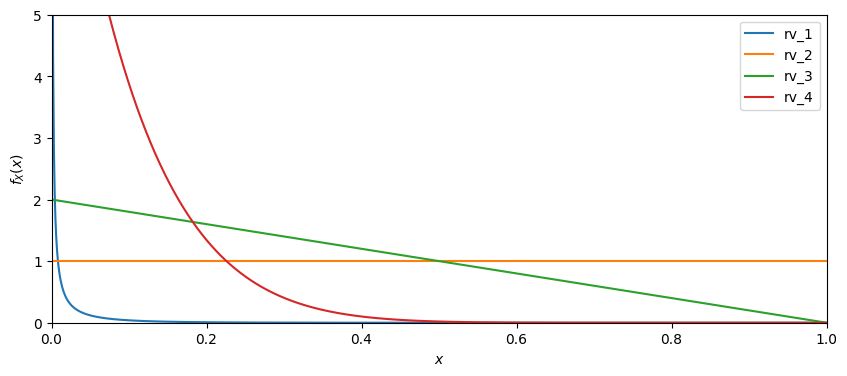

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_pdf(ax, rv, config_dict={'label':rv.get_name(), 'x_low':1e-6, 'x_up':0.999}) 

ax.set_ylim([0., 5.])
ax.set_xlim([0., 1.])
plt.xlabel(r"$x$")
plt.ylabel(r"$f_X(x)$")
plt.legend()
plt.show()

## CDF

The CDF $F_X(x)$ of the *beta* distribution is defined as:

$$F_X(x) = I_{w}\left(\alpha,\beta\right)$$

where $I_w(\alpha,\beta)$ denotes the regularized incomplete beta function, and $w = \frac{x-a}{b-a}$.

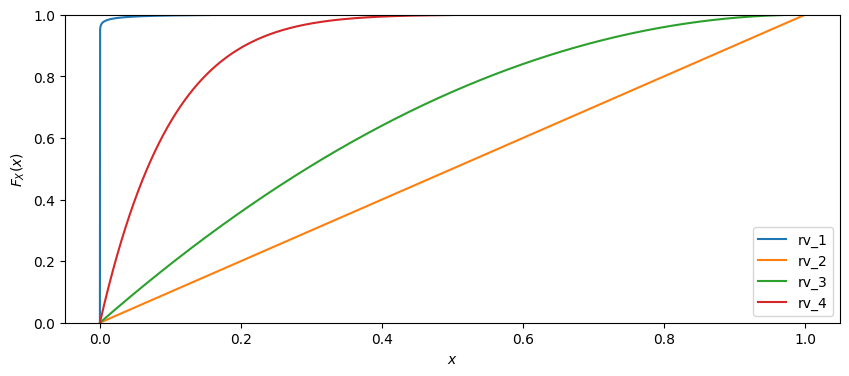

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_cdf(ax, rv, config_dict={'label':rv.get_name()}) 
    
ax.set_ylim([0., 1.])
plt.xlabel(r"$x$")
plt.ylabel(r"$F_X(x)$")
plt.legend()
plt.show()

## Quantile function

The *quantile function* of the *Normal* distribution is: 

$$F_X^{-1}(p) = \mu_X + \sigma_X \cdot\Phi^{-1}(p) \;, \quad p\in(0,1)$$

where $\Phi^{-1}(\cdot)$ is the quantile function of the standard Normal distribution.

## Standardizing Normal random variables

The *Normal* random variable $X$ can be transformed to a {ref}`content:rv:stdn` $U$ through:

$$U = \frac{X-\mu_X}{\sigma_X}$$

Conversely, a Normal random variable $X$ with mean $\mu_X$ and standard deviation $\sigma_X$ can be generated from a standard Normal variable as:

$$X = \mu_X + \sigma_X \cdot U$$